<a href="https://colab.research.google.com/github/RPatra2010/Easy21-RL/blob/master/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
from google.colab import files
uploaded = files.upload()

Saving environment.py to environment.py


In [0]:
from environment import env
e = env()

In [0]:
#state function aproximation
Q = np.zeros((22, 11, len(e.actionSpace())))

In [0]:
#number of times the action a has been chosen in a state (p, d)
NSA = np.zeros((22, 11, len(e.actionSpace())))

#number of times a state has been visited
NS = lambda p,d : np.sum(NSA[p, d])

#learning rate
learning_rate = lambda p, d, a : 1/NSA[p, d, a]

#exploration policy
epsilon = lambda p, d : N0/(N0 + NS(p, d))

In [0]:
def epsilon_greedy(p, d):
    prob = np.random.uniform(0, 1)
    if prob < epsilon(p, d):
        action = np.random.choice(e.actionSpace())
    else:
        action = np.argmax([Q[p, d, a] for a in e.actionSpace()])
    
    return action

In [87]:
#the main agent env interaction loop

episodes = 1000000
mean_return = 0
wins = 0

mean_returns_list = list()
wins_list = list()

for i in range(episodes):
    SAR = list()
    sum_rewards = 0
    player, dealer = e.startGame()
    terminated = False

    #sample the environment
    while not terminated:
        action = epsilon_greedy(player, dealer)

        NSA[player, dealer, action] += 1
        next_player, next_dealer, reward, terminated = e.step(player, dealer, action)
        sum_rewards += reward

        SAR.append([player, dealer, action, reward])
        player = next_player
        dealer = next_dealer

    #update the q values
    G = sum_rewards

    for (p, d, a, _) in SAR:
        Q[p, d, a] += learning_rate(p, d, a) * (G - Q[p, d, a])
    
    mean_return = mean_return + 1/(i+1) * (G - mean_return)
    mean_returns_list.append(mean_return)
    if reward == 1:
        wins += 1
    
    wins_list.append(wins/(i+1))
    
    if i % 10000==0:
        print("Episode", i+1)
        print("mean return", mean_return)
        print("wins %", wins/(i+1))

Episode 1
mean return 1.0
wins % 1.0
Episode 10001
mean return 0.01299870012998699
wins % 0.49695030496950304
Episode 20001
mean return 0.0077496125193740155
wins % 0.49472526373681314
Episode 30001
mean return 0.00669977667411085
wins % 0.4939168694376854
Episode 40001
mean return -0.0022249443763906044
wins % 0.489612759681008
Episode 50001
mean return -0.0019799604007920153
wins % 0.4899902001959961
Episode 60001
mean return 0.001766637222712927
wins % 0.4918251362477292
Episode 70001
mean return 0.003199954286367323
wins % 0.492621533978086
Episode 80001
mean return 0.0018999762502968655
wins % 0.4919313508581143
Episode 90001
mean return 0.0011666537038477348
wins % 0.491394540060666
Episode 100001
mean return 0.002629973700263
wins % 0.4921450785492145
Episode 110001
mean return 0.0025817947109571817
wins % 0.49207734475141135
Episode 120001
mean return 0.0026666444446296475
wins % 0.49204589961750317
Episode 130001
mean return 0.002292290059307241
wins % 0.49191929292851594
Epis

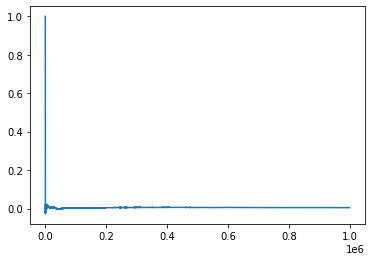

In [88]:
plt.plot(mean_returns_list)

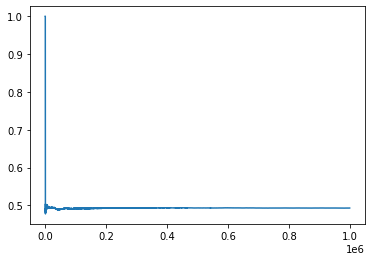

In [89]:
plt.plot(wins_list)

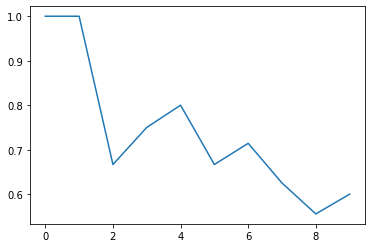

In [96]:
plt.plot(wins_list[0:10])

In [0]:
def plot(Q, actions):

    from mpl_toolkits.mplot3d import Axes3D

    pRange = list(range(1,22))
    dRange = list(range(1,11))
    vStar = list()
    for p in pRange:
        for d in dRange:
            q_star = np.max([Q[p, d, a] for a in e.actionSpace()])
            vStar.append([p, d, q_star])

    df = pd.DataFrame(vStar, columns=['player', 'dealer', 'value'])

    # And transform the old column name in something numeric
    # df['player']=pd.Categorical(df['player'])
    # df['player']=df['player'].cat.codes

    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['dealer'], df['player'], df['value'], cmap=plt.cm.viridis, linewidth=0.2)
    plt.show()

    # to Add a color bar which maps values to colors.
    surf=ax.plot_trisurf(df['dealer'], df['player'], df['value'], cmap=plt.cm.viridis, linewidth=0.2)
    fig.colorbar( surf, shrink=0.5, aspect=5)
    plt.show()

    # Rotate it
    ax.view_init(30, 45)
    plt.show()

    # Other palette
    ax.plot_trisurf(df['dealer'], df['player'], df['value'], cmap=plt.cm.jet, linewidth=0.01)
    plt.show()

In [0]:
Q[10, 3, 0] = 0

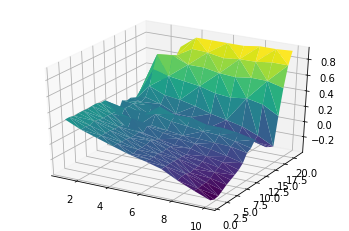

In [113]:
plot(Q, [0, 1])